# Einfache Textanalyse

In [2]:
import os
import pandas as pd
import textract
import re

Ein Liste der PDF mit OS kreiieren: Zuerst die PDF in einen Ornder mit namen pdfs verschieben:

In [3]:
filelist = os.listdir("pdfs")
filelist.pop(2)
filelist
filelist.sort()
filelist.pop(0)
filelist

['2015-02-19-account-data.pdf',
 '2015-04-02-account-data.pdf',
 '2015-05-21-account-data.pdf',
 '2015-07-02-account-data.pdf',
 '2015-08-13-account-data.pdf',
 '2015-10-08-account-data.pdf',
 '2015-11-19-account-data.pdf',
 '2015-12-02-account-data.pdf',
 '2016-02-18-account-data.pdf',
 '2016-04-07-account-data.pdf',
 '2016-05-19-account-data.pdf',
 '2016-06-21-account-data.pdf',
 '2016-08-18-account-data.pdf',
 '2016-10-06-account-data.pdf',
 '2016-11-17-account-data.pdf',
 '2017-01-12-account-data.pdf',
 '2017-02-16-account-data.pdf',
 '2017-04-06-account-data.pdf',
 '2017-05-18-account-data.pdf',
 '2017-07-06-account-data.pdf',
 '2017-08-17-account-data.pdf',
 '2017-11-23-account-data.pdf',
 '2018-01-11-account-data.pdf',
 '2018-02-22-account-data.pdf',
 '2018-04-12-account-data.pdf',
 '2018-05-24-account-data.pdf',
 '2018-07-12-account-data.pdf',
 '2018-08-23-account-data.pdf',
 '2018-10-11-account-data.pdf',
 '2018-11-22-account-data.pdf',
 '2019-01-10-account-data.pdf',
 '2019-0

jetzt dataframe bauen mit zwei Kmponenten: Progressbar könnte hilfreich sein
{"Filename": "pdfs/Vk_20180226_08documents0.pdf", "Text"}

In [4]:
import progressbar

In [5]:
progresslist = range(len(filelist))
progresslist

range(0, 32)

In [6]:
newlist = []
bar = progressbar.ProgressBar()
progresslist = range(len(filelist))

for file,b in zip(filelist, bar(progresslist)):
    try:
        byts = textract.process("pdfs/"+file, method="pdfminer", encoding="ascii")
        text = byts.decode("ascii").replace("\n"," ")
    
        mini_dict = {"Filename":file,
                "Text": text}
        
        newlist.append(mini_dict)
    except:
        mini_dict = {"Filename":file,
                "Text": "Fehlermeldung"}
        
        newlist.append(mini_dict)

 96% (31 of 32) |####################### | Elapsed Time: 0:01:45 ETA:   0:00:03

In [8]:
df = pd.DataFrame(newlist)
df.head()

,Filename,Text
0,2015-02-19-account-data.pdf,19. Februar 2015 ...
1,2015-04-02-account-data.pdf,2. April 2015 d ...
2,2015-05-21-account-data.pdf,21. Mai 2015 Zusammenfass...
3,2015-07-02-account-data.pdf,2. Juli 2015 Zusammenfass...
4,2015-08-13-account-data.pdf,13. August 2015 Zusammenf...


In [9]:
#es fehlt noch eine Spalte mit einem richtigen Datum mit timestamp
# für den einzelfall:
test = "2019-01-10-account-data.pdf"

In [10]:
#Funktion mit Namen "Date":
def date (elem):
    return elem.split("-ac")[0]

In [11]:
date(test)

'2019-01-10'

In [12]:
#nun die Funktion mit apply auf alle Zeilen anwenden und in neue Spalte "Datum" dazufügen:
df["Datum"] = df["Filename"].apply(date)
df.head()

,Filename,Text,Datum
0,2015-02-19-account-data.pdf,19. Februar 2015 ...,2015-02-19
1,2015-04-02-account-data.pdf,2. April 2015 d ...,2015-04-02
2,2015-05-21-account-data.pdf,21. Mai 2015 Zusammenfass...,2015-05-21
3,2015-07-02-account-data.pdf,2. Juli 2015 Zusammenfass...,2015-07-02
4,2015-08-13-account-data.pdf,13. August 2015 Zusammenf...,2015-08-13


In [13]:
#Das Datum ist noch ein stringobjekt, aber wir wollen ein richtiges Datum: to_datemie 
df["Datum"] = pd.to_datetime(df["Datum"], format="%Y-%m-%d")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
Filename    32 non-null object
Text        32 non-null object
Datum       32 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 848.0+ bytes


In [15]:
#jetzt Datum zum Index machen:
df.index = df["Datum"]
df.head()

,Filename,Text,Datum
Datum,,,
2015-02-19,2015-02-19-account-data.pdf,19. Februar 2015 ...,2015-02-19
2015-04-02,2015-04-02-account-data.pdf,2. April 2015 d ...,2015-04-02
2015-05-21,2015-05-21-account-data.pdf,21. Mai 2015 Zusammenfass...,2015-05-21
2015-07-02,2015-07-02-account-data.pdf,2. Juli 2015 Zusammenfass...,2015-07-02
2015-08-13,2015-08-13-account-data.pdf,13. August 2015 Zusammenf...,2015-08-13


In [16]:
del df["Datum"] #löscht die Spalte Datum rechts

In [17]:
df.reset_index()
df.head()

,Filename,Text
Datum,,
2015-02-19,2015-02-19-account-data.pdf,19. Februar 2015 ...
2015-04-02,2015-04-02-account-data.pdf,2. April 2015 d ...
2015-05-21,2015-05-21-account-data.pdf,21. Mai 2015 Zusammenfass...
2015-07-02,2015-07-02-account-data.pdf,2. Juli 2015 Zusammenfass...
2015-08-13,2015-08-13-account-data.pdf,13. August 2015 Zusammenf...


In [18]:
#wieviele Wörter hat so ein Protokoll?
len(df["Text"][31].split(" "))

8219

In [19]:
#Wenn die Kerninflation (Inflation ohne Preise für Energie und Nahrungsmittel) zunimmt, dann sollte 
#die Geldpolitik straffer werden
#Wie oft kommt das Thema vor? Suchbegriffe: zugrunde liegende. Inflation, ohne Energie und Nahrungsmittel

In [26]:
corecounts = []
for element in df["Text"]:
    corecount = len(re.findall(r"zugrunde liegende. Inflation", element, re.IGNORECASE))
    corecounts.append(corecount)

In [27]:
corecounts2 = []
for element in df["Text"]:
    corecount2 = len(re.findall(r"ohne Energie und Nahrungsmittel", element, re.IGNORECASE))
    corecounts2.append(corecount2)

In [28]:
# weil es in manchen PDF mehrere Lehrschläge gibt, werden nicht alle Suchbegriffe gefunden. 
corecounts3 = []
for element in df["Text"]:
    corecount3 = len(re.findall(r"ohne  Energie  und  Nahrungsmittel", element, re.IGNORECASE))
    corecounts3.append(corecount3)

In [29]:
#die beiden neuen KerninflationsListen dem Dataframe zufügen und addieren: 
underlying = pd.Series(corecounts)
df['underlying'] = underlying.values

exfood = pd.Series(corecounts2)
df['exfood'] = exfood.values

exfood2 = pd.Series(corecounts3)
df["exfood2"] = exfood2.values

df["kerninflation"] = df['underlying'] + df['exfood'] + df["exfood2"]

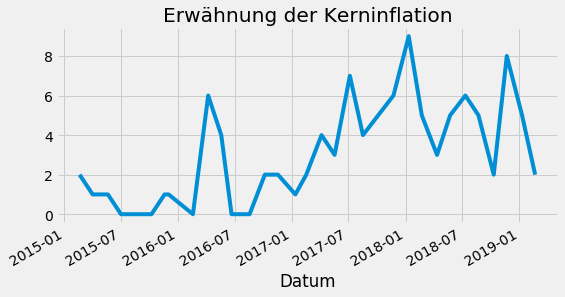

In [30]:
#jetzt plotten und Grafik speichern:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

matplotlib.rcParams['pdf.fonttype'] = 42 #important for the fonts
df['kerninflation'].plot(figsize=(8,4), title="Erwähnung der Kerninflation")
plt.savefig("Grafiken/Kerninflation.pdf")
plt.savefig("Grafiken/Kerninflation.svg")

In [31]:
#Wie oft kommen die Begriffe Deflation und Risiko/Risiken vor
deflationcounts = []
for element in df["Text"]:
    deflationcount = len(re.findall(r"deflation", element, re.IGNORECASE))
    deflationcounts.append(deflationcount)

In [35]:
riskcounts = []
for element in df["Text"]:
    riskcount = len(re.findall(r"risik", element, re.IGNORECASE))
    riskcounts.append(riskcount)

In [36]:
#die Listen Risk und Deflation dem Dataframe zufügen: 
risk = pd.Series(riskcounts)
df['risk'] = risk.values

deflation = pd.Series(deflationcounts)
df['deflation'] = deflation.values

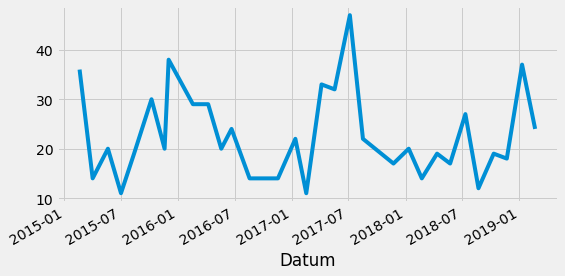

In [37]:
df['risk'].plot(figsize=(8,4))

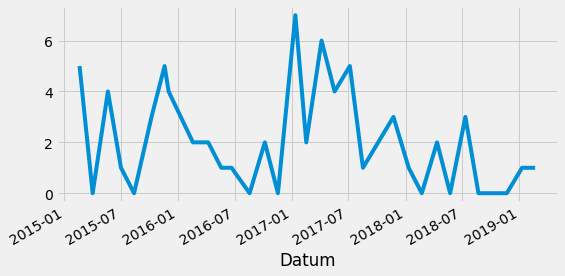

In [38]:
df['deflation'].plot(figsize=(8,4))

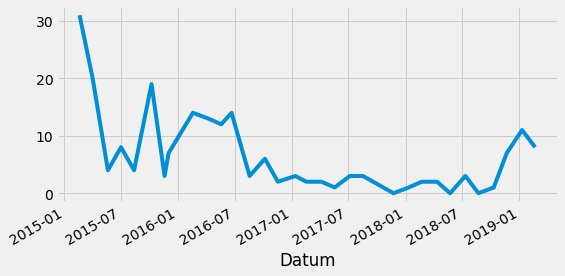

In [39]:
#wann war der Ölpreis ein Thema?
oelcounts = []
for element in df["Text"]:
    oelcount = len(re.findall(r".lpreis.", element, re.IGNORECASE))
    oelcounts.append(oelcount)
oel = pd.Series(oelcounts)
df['oel'] = oel.values
df['oel'].plot(figsize=(8,4))

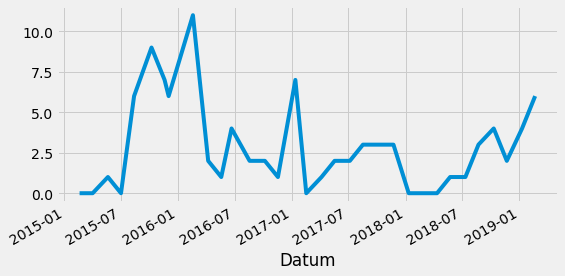

In [40]:
#wann waren der Schwellenländer ein Thema?
emmas = []
for element in df["Text"]:
    emma = len(re.findall(r"schwellenlnder", element, re.IGNORECASE))
    emmas.append(emma)
schwellenländer = pd.Series(emmas)
df['schwellenländer'] = schwellenländer.values
df['schwellenländer'].plot(figsize=(8,4))

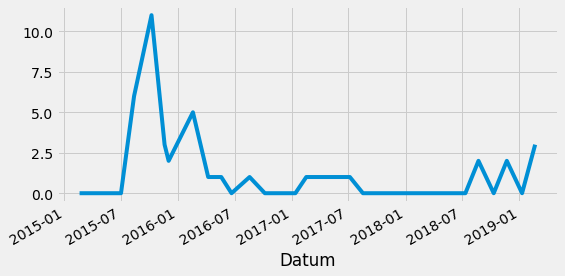

In [41]:
#wann war China ein Thema?
chinacounts = []
for element in df["Text"]:
    china = len(re.findall(r"china", element, re.IGNORECASE))
    chinacounts.append(china)
china = pd.Series(chinacounts)
df['china'] = china.values
df['china'].plot(figsize=(8,4))

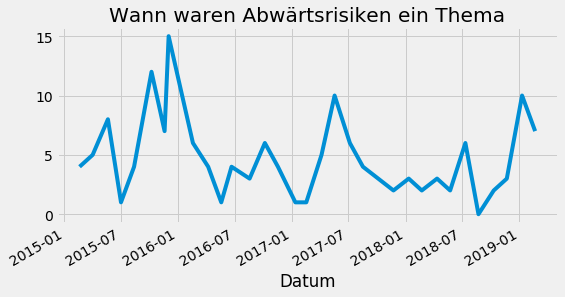

In [42]:
#wann waren Abwärtrisiken (abwrtsrisik..) ein Thema?
downsiderisks = []
for element in df["Text"]:
    downside = len(re.findall(r"abwrtsrisik..", element, re.IGNORECASE))
    downsiderisks.append(downside)
downsiderisk = pd.Series(downsiderisks)
df['Abwärtsrisiken'] = downsiderisk.values
df['Abwärtsrisiken'].plot(figsize=(8,4), title= "Wann waren Abwärtsrisiken ein Thema")

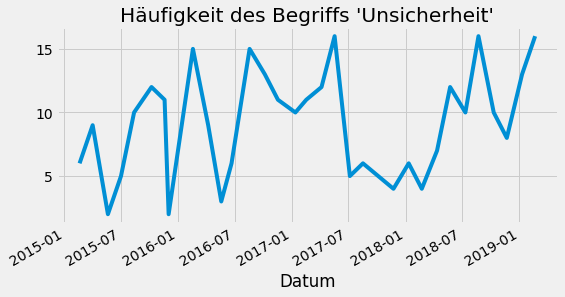

In [43]:
#wann unsicherheit?
unsichercount = []
for element in df["Text"]:
    unsicher = len(re.findall(r"unsicherheit", element, re.IGNORECASE))
    unsichercount.append(unsicher)
unsicherheit = pd.Series(unsichercount)
df['Unsicherheit'] = unsicherheit.values
df['Unsicherheit'].plot(figsize=(8,4), title= "Häufigkeit des Begriffs 'Unsicherheit'")

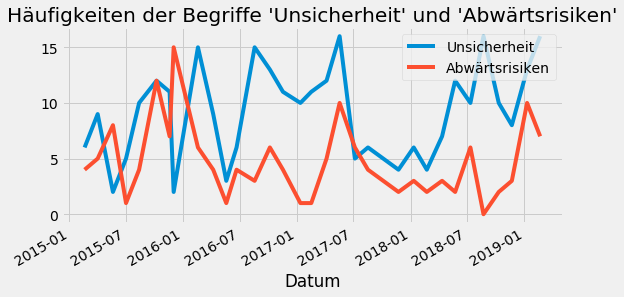

In [44]:
#Eine Grafik mit Unsicherheit und Abwärstrisiken in einem:
df.plot(y=['Unsicherheit', 'Abwärtsrisiken'], figsize=(8,4), grid=True, title = "Häufigkeiten der Begriffe 'Unsicherheit' und 'Abwärtsrisiken'")
plt.savefig("Grafiken/Risiko.pdf")
plt.savefig("Grafiken/Risiko.svg")

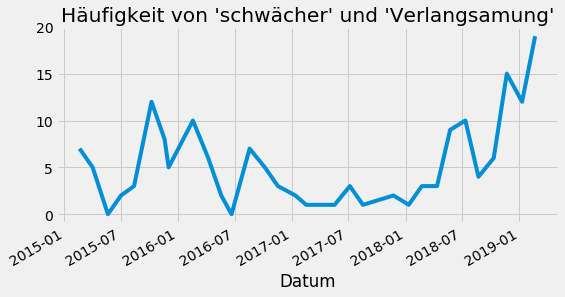

In [45]:
#Wann waren schwächerer Daten und Verlangsamung ein Thema?
slowcount = []
for element in df["Text"]:
    slow = len(re.findall(r"schwche", element, re.IGNORECASE)) + len(re.findall(r"verlangsamung", element, re.IGNORECASE))
    slowcount.append(slow)
weaker = pd.Series(slowcount)
df['Schwächer'] = weaker.values
df['Schwächer'].plot(figsize=(8,4), title= "Häufigkeit von 'schwächer' und 'Verlangsamung'" )
plt.savefig("Grafiken/Verlangsamung.pdf")
plt.savefig("Grafiken/Verlangsamung.svg")

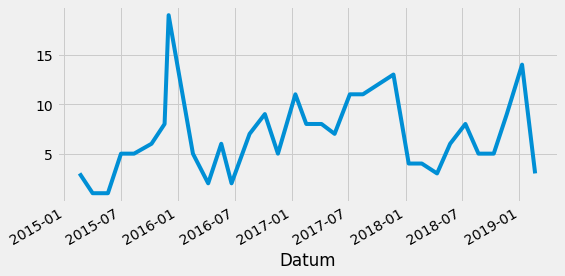

In [46]:
#wie oft kommt das Wort "Akkomodierung" vor?
akkommodcount = []
for element in df["Text"]:
    akkommod = len(re.findall(r"akkommodier", element, re.IGNORECASE))
    akkommodcount.append(akkommod)
akkommodierung = pd.Series(akkommodcount)
df['akkommodierung'] = akkommodierung.values
df['akkommodierung'].plot(figsize=(8,4))

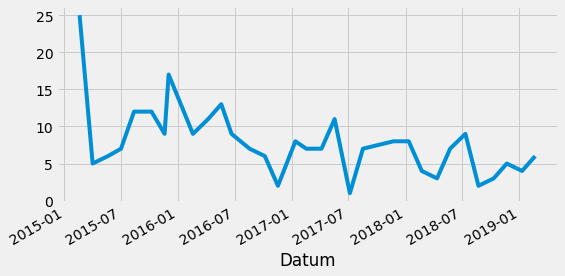

In [47]:
#wie oft kommt das Wort "inflationserwartung" vor?
erwartungcount = []
for element in df["Text"]:
    infle = len(re.findall(r"inflationserwartung", element, re.IGNORECASE))
    erwartungcount.append(infle)
inflationserwartung = pd.Series(erwartungcount)
df['inflationserwartung'] = inflationserwartung.values
df['inflationserwartung'].plot(figsize=(8,4))

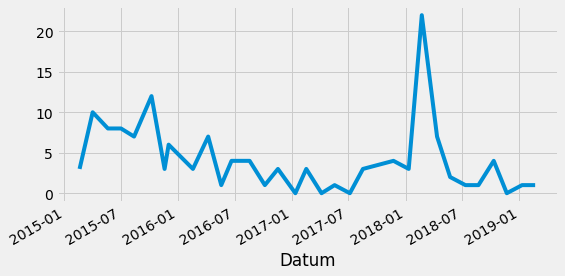

In [48]:
#wie oft kommt das Wort "Wechselkurs" vor?
fxcount = []
for element in df["Text"]:
    fx = len(re.findall(r"wechselkurs", element, re.IGNORECASE))
    fxcount.append(fx)
wechselkurs = pd.Series(fxcount)
df['wechselkurs'] = wechselkurs.values
df['wechselkurs'].plot(figsize=(8,4))

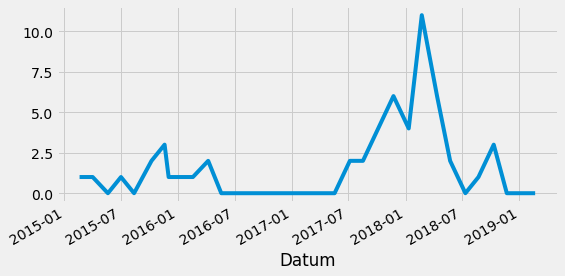

In [49]:
#wie oft kommt das Thema "Aufwertung des Euro" vor?
eurocount = []
for element in df["Text"]:
    euro = len(re.findall(r"aufwertung", element, re.IGNORECASE))
    eurocount.append(euro)
waehrung = pd.Series(eurocount)
df['waehrung'] = waehrung.values
df['waehrung'].plot(figsize=(8,4))

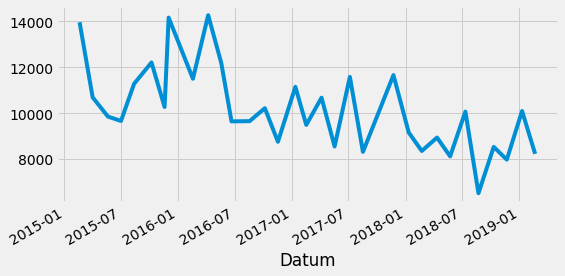

In [50]:
#wie lang waren die accounts eigentlich?
wordcounts = []
for element in df["Text"]:
    words = len(element.split(" "))
    wordcounts.append(words)
length = pd.Series(wordcounts)
df['length'] = length.values
df['length'].plot(figsize=(8,4))

# Sentimentanalyse

In [60]:
import os
import pandas as pd
import textract
import nltk
from nltk.tokenize import word_tokenize

In [61]:
#Sentiment mit Textblob
from textblob_de import TextBlobDE
blob = TextBlobDE("Das ist ein hässliches Auto.")     
blob.sentiment

Sentiment(polarity=-1.0, subjectivity=0.0)

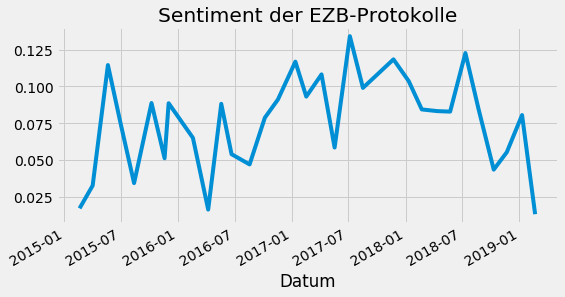

In [74]:
#wie positiv ist die Stimmung in den Accounts? Achtung das dauert.
from textblob_de import TextBlobDE
polarlist = []
for element in df["Text"]:
    blob = TextBlobDE(element)
    polar = blob.sentiment.polarity
    polarlist.append(polar)

sentiment = pd.Series(polarlist)
df['sentiment'] = sentiment.values #fügt Serie dem Dataframe df an
#plotten
df['sentiment'].plot(figsize=(8,4), title="Sentiment der EZB-Protokolle")
plt.savefig("Grafiken/Sentiment.pdf")
plt.savefig("Grafiken/Sentiment.svg")